In [1]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import math
from math import log
from random import randrange, getrandbits
import random
import time
import hashlib

In [2]:
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]
    return img_arnold

def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite("ArnoldcatEnc.png", img)
    return img

def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite("ArnoldcatDec.png",img)
    return img

In [3]:
def same(img1,img2):
  a = cv2.imread(img1)
  b = cv2.imread(img2)
  difference = cv2.subtract(a, b)
  result = not np.any(difference)
  if result is True:
      print("Pictures are the same")
  else:
      print("Pictures are different")

In [4]:
def is_prime(number):
    if number <= 1:
        return False
    else:
        for i in range(2, int(math.sqrt(number)) + 1):
            if number % i == 0:
                return False
        return True

def generate_primes():
    while True:
        prime1 = random.randint(100, 1000)
        prime2 = random.randint(100, 1000)
        if is_prime(prime1) and is_prime(prime2) and prime1 != prime2:
            return prime1, prime2

def generate_E(m):
    coprime_number = 2
    while math.gcd(m, coprime_number) != 1:
        coprime_number = random.randint(2, m - 1)
    return coprime_number

def generate_D(M, E):
    k = 1
    while True:
        d = (((M * k) + 1) / E)
        if d == int(d):
            return int(d)
        k += 1

def generate_key_pair():
    p, q = generate_primes()
    n = p * q
    m = (p - 1) * (q - 1)
    e = generate_E(m)
    d = generate_D(m, e)
    return p, q, n, m, e, d

def encrypt_image(flat_image, E, modulus):
    encrypted_text = [pow(int(flat_image[i]), E, modulus) for i in range(len(flat_image))]
    return np.array(encrypted_text)

def decrypt_image(encrypted_image, D, modulus):
    decrypted_text = [pow(int(encrypted_image[i]), D, modulus) for i in range(len(encrypted_image))]
    return np.array(decrypted_text)

def reshape_image(flattened_image, height, width):
    return flattened_image.reshape(height, width, 3)

def RSA(img,ENC_TIME,DEC_TIME):
    height, width = img.shape[:2]

    p, q, n, m, E, D = generate_key_pair()
    flat_array_of_original_image = img.flatten()

    start_time=time.time()
    encrypted_image_text = encrypt_image(flat_array_of_original_image, E, n)
    encrypted_image_img = reshape_image(encrypted_image_text, height, width)
    encrypted_time=time.time()
    print("RSA Encrypted time",abs(encrypted_time-start_time))
    ENC_TIME.append(abs(encrypted_time-start_time))
    start_time=time.time()
    # print("Sending ", p," ", q," " ,n," " ,E," to user")
    decrypted_image_text = decrypt_image(encrypted_image_text, D, n)
    decrypted_image_img = reshape_image(decrypted_image_text, height, width)
    decrypted_time=time.time()
    print("RSA Decrypted time",abs(decrypted_time-start_time))
    DEC_TIME.append(abs(decrypted_time-start_time))
    # print("RSA Encrypted Image")
    cv2.imwrite("encrypted_image.png", encrypted_image_img)
    # cv2_imshow(cv2.imread("encrypted_image.png"))
    # print("RSA Decrypted Image")
    cv2.imwrite("decrypted_image.png", decrypted_image_img)
    # cv2_imshow(cv2.imread("decrypted_image.png"))
def RSA1(img):
    height, width = img.shape[:2]
    p, q, n, m, E, D = generate_key_pair()
    flat_array_of_original_image = img.flatten()
    start_time1=time.time()
    encrypted_image_text = encrypt_image(flat_array_of_original_image, E, n)
    encrypted_image_img = reshape_image(encrypted_image_text, height, width)
    encrypted_time=time.time()
    print("Sending ", p," ", q," " ,n," " ,E," to user")
    start_time2=time.time()
    decrypted_image_text = decrypt_image(encrypted_image_text, D, n)
    decrypted_image_img = reshape_image(decrypted_image_text, height, width)
    decrypted_time=time.time()
    print("RSA Encrypted Image")
    print("RSA Encrypted time",abs(encrypted_time-start_time1))
    cv2.imwrite("encrypted_image.png", encrypted_image_img)
    cv2_imshow(cv2.imread("encrypted_image.png"))
    print("RSA Decrypted Image")
    print("RSA Decrypted time",abs(decrypted_time-start_time2))
    cv2.imwrite("decrypted_image.png", decrypted_image_img)
    cv2_imshow(cv2.imread("decrypted_image.png"))

In [5]:
def rgb(img1,img2):
  im1=cv2.imread(img1)
  im2=cv2.imread(img2)
  rows,col,size=im1.shape
  difference=0
  for j in range(rows):
    for k in range(col):
      if(np.array_equal(np.array(im1[j][k]),np.array(im2[j][k]))==False):
        difference=difference+1
  return difference

In [6]:
def hist(image,ext):
  himg = cv2.imread(image + ext,1)
  pil_im = Image.open(image + ext, 'r')
  plt.imshow(np.asarray(pil_im))
  plt.figure(figsize=(14,6))
  histogram_blue = cv2.calcHist([himg],[0],None,[256],[0,256])
  plt.plot(histogram_blue, color='blue')
  histogram_green = cv2.calcHist([himg],[1],None,[256],[0,256])
  plt.plot(histogram_green, color='green')
  histogram_red = cv2.calcHist([himg],[2],None,[256],[0,256])
  plt.plot(histogram_red, color='red')
  plt.title('Intensity Histogram - Original Image', fontsize=20)
  plt.xlabel('pixel values', fontsize=16)
  plt.ylabel('pixel count', fontsize=16)
  plt.show()

In [7]:
def preprocess(image,ext):
  if(ext!=".png"):
    img=cv2.imread(image+ext)
    cv2.imwrite(image+".png",img)
  ext=".png"
  img=cv2.imread(image+ext)
  img=cv2.resize(img,(250,250))
  cv2.imwrite("small.png",img)
  cv2_imshow(cv2.imread("small.png"))

In [8]:
def arnold_rsa(image,ext,key):
  preprocess(image,ext)
  ext=".png"
  image="small"
  start_time=time.time()
  ArnoldCatEncryptionIm = ArnoldCatEncryption(image +ext, key)
  e_time=time.time()
  print("arnold cat encrypted time seconds ",(e_time-start_time))
  print("Arnold Cat Encrypted Image")
  cv2_imshow(ArnoldCatEncryptionIm)
  RSA1(ArnoldCatEncryptionIm)
  start_time=time.time()
  ArnoldCatDecryptionIm = ArnoldCatDecryption("decrypted_image.png", key)
  d_time = time.time()
  decrypt_time = time.time() - d_time
  print("Arnold Cat Decrypted Image")
  cv2_imshow(ArnoldCatDecryptionIm)
  print("arnold cat Decrypted time seconds ",(d_time-start_time))
  print("Time taken ")

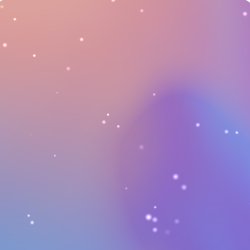

arnold cat encrypted time seconds  1.013695478439331
Arnold Cat Encrypted Image


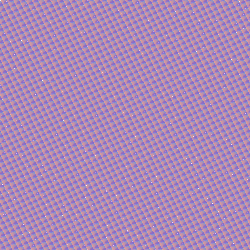

Sending  419   149   62431   42565  to user
RSA Encrypted Image
RSA Encrypted time 0.4132661819458008


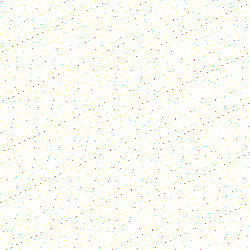

RSA Decrypted Image
RSA Decrypted time 0.45892953872680664


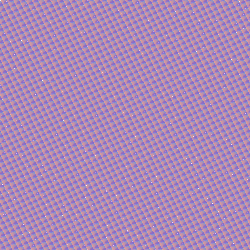

Arnold Cat Decrypted Image


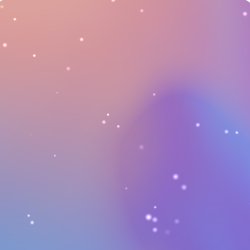

arnold cat Decrypted time seconds  55.553335189819336
Time taken 


In [ ]:
arnold_rsa("hello",".png",15)

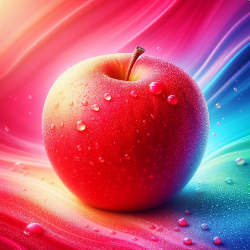

arnold cat encrypted time seconds  1.9322826862335205
Arnold Cat Encrypted Image


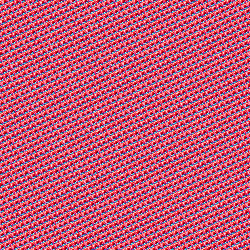

Sending  617   541   333797   38477  to user
RSA Encrypted Image
RSA Encrypted time 0.775275468826294


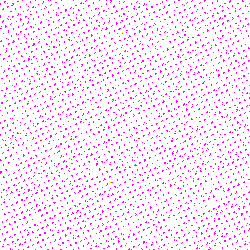

RSA Decrypted Image
RSA Decrypted time 0.877018928527832


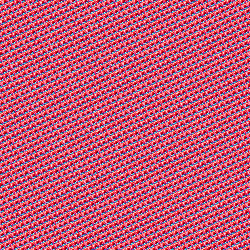

Arnold Cat Decrypted Image


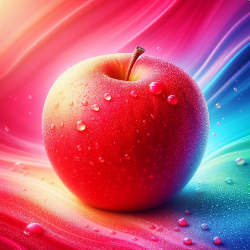

arnold cat Decrypted time seconds  53.771058082580566
Time taken 


In [ ]:
arnold_rsa("apple",".png",15)

In [ ]:
same("small.png","ArnoldcatDec.png")

In [ ]:
same("small.png","ArnoldcatDec.png")

Pictures are the same


#Graphs

In [ ]:
lst=["small","ArnoldcatEnc","ArnoldcatDec","encrypted_image","decrypted_image"]
for img in lst:
  print(img)
  hist(img,ext)
  print("\n")

In [ ]:
preprocess("rgbbw1",".png")

In [ ]:
RSA_ENC_TIME=[]
RSA_DEC_TIME=[]
ARN_ENC_TIME=[]
ARN_DEC_TIME=[]
image="small"
ext=".png"
for key in range(2,21):
  print("KEY: ",key)
  start_time=time.time()
  ArnoldCatEncryptionIm = ArnoldCatEncryption(image +ext, key)
  enc_time=time.time()
  ARN_ENC_TIME.append(abs(enc_time-start_time))
  print("ARN Encrypted time ",abs(enc_time-start_time))
  RSA(ArnoldCatEncryptionIm,RSA_ENC_TIME,RSA_DEC_TIME)
  start_time=time.time()
  ArnoldCatDecryptionIm = ArnoldCatDecryption("decrypted_image.png", key)
  dec_time=time.time()
  ARN_DEC_TIME.append(abs(dec_time-start_time))
  print("ARN Decrypted time ",abs(dec_time-start_time))
  print("\n")

KEY:  10
ARN Encrypted time  0.6431636810302734
RSA Encrypted time 0.4120352268218994
RSA Decrypted time 0.4409008026123047
ARN Decrypted time  62.70197057723999


KEY:  11
ARN Encrypted time  0.72524094581604
RSA Encrypted time 0.45157837867736816
RSA Decrypted time 0.5054023265838623
ARN Decrypted time  53.94760012626648


KEY:  12
ARN Encrypted time  1.479417324066162
RSA Encrypted time 0.5130045413970947
RSA Decrypted time 0.39803409576416016
ARN Decrypted time  52.683342695236206


KEY:  13
ARN Encrypted time  0.8540618419647217
RSA Encrypted time 0.42966151237487793
RSA Decrypted time 0.5053396224975586
ARN Decrypted time  53.69762659072876


KEY:  14
ARN Encrypted time  0.9618029594421387
RSA Encrypted time 0.6541018486022949
RSA Decrypted time 0.8740391731262207
ARN Decrypted time  52.92868113517761


KEY:  15
ARN Encrypted time  0.975884199142456
RSA Encrypted time 0.3870663642883301
RSA Decrypted time 0.32512521743774414
ARN Decrypted time  52.406572103500366


KEY:  16
ARN E

In [ ]:
print(RSA_ENC_TIME,"\n",RSA_DEC_TIME,"\n",ARN_ENC_TIME,"\n",ARN_DEC_TIME)

[1.5341534614562988, 0.32596540451049805, 0.7516365051269531, 0.4221982955932617, 0.43010687828063965, 0.4558074474334717, 0.4769899845123291, 0.4316987991333008, 0.4120352268218994, 0.45157837867736816, 0.5130045413970947, 0.42966151237487793, 0.6541018486022949, 0.3870663642883301, 0.438906192779541, 0.7978465557098389, 0.4219551086425781, 0.8260490894317627, 0.45566725730895996] 
 [1.1741485595703125, 0.2862980365753174, 0.7522237300872803, 0.47208333015441895, 0.5180399417877197, 0.5126650333404541, 0.5493254661560059, 0.4955770969390869, 0.4409008026123047, 0.5054023265838623, 0.39803409576416016, 0.5053396224975586, 0.8740391731262207, 0.32512521743774414, 0.4926900863647461, 0.7245237827301025, 0.44123172760009766, 0.9308414459228516, 0.4689004421234131] 
 [0.4187662601470947, 0.19327354431152344, 0.5283486843109131, 0.3285372257232666, 0.39337873458862305, 0.4612300395965576, 0.5318553447723389, 0.5837090015411377, 0.6431636810302734, 0.72524094581604, 1.479417324066162, 0.8540

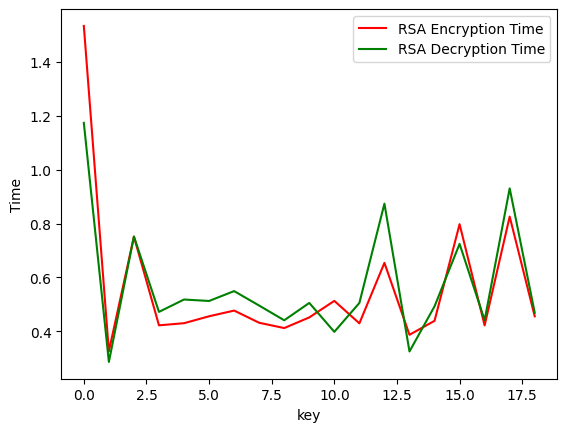

In [ ]:
plt.plot(RSA_ENC_TIME,color="red",label="RSA Encryption Time")
plt.plot(RSA_DEC_TIME,color="green",label="RSA Decryption Time")
plt.ylabel('Time')
plt.xlabel('key')
plt.legend()
plt.show()

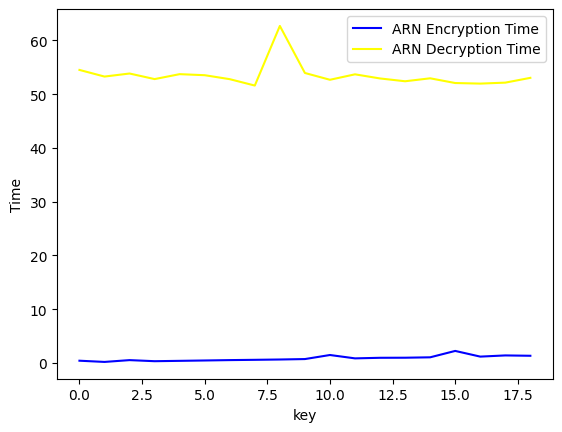

In [ ]:
plt.plot(ARN_ENC_TIME,color="blue",label="ARN Encryption Time")
plt.plot(ARN_DEC_TIME,color="yellow",label="ARN Decryption Time")
plt.ylabel('Time')
plt.xlabel('key')
plt.legend()
plt.show()

In [ ]:
print("Pixels Different from original image and (ArnoldCat + RSA) Encrypted Image: ",rgb("small.png","encrypted_image.png"))
print("Pixels Different from original image and ArnoldCat Encrypted Image: ",rgb("small.png","ArnoldcatEnc.png"))
print("Pixels Different from ArnoldCat Encrypted Image and (RSA + ArnoldCat) Encrypted Image ",rgb("encrypted_image.png","ArnoldcatEnc.png"))

62500
62465
62500
